In [38]:
import cv2 as cv
import numpy as np 
import os
import matplotlib.pyplot as plt

# round val to the nearest of the following values 1, 2, 5, 10
def round_to_nearest(val):
    if val < 2 and val > .5:
        return 1
    if val < 5 and val > 2:
        return 2
    if val < 10 and val > 5:
        return 5
    if val > 10:
        return 10

In [39]:
# List all the files under /monedas/
monedas = os.listdir("monedas")

# Sort the list by number
monedas.sort(key=lambda x: int(x.split(".")[0]))

print(len(monedas))
print(monedas)


7
['2.JPG', '3.JPG', '8.JPG', '11.JPG', '12.JPG', '19.JPG', '25.JPG']


In [40]:
listOfAreas = []
for moneda in monedas:
    I = cv.imread("monedas/" + moneda)
    # resize the image to 50% of its original size
    resizeFactor = 0.2
    I = cv.resize(I, (0, 0), fx=resizeFactor, fy=resizeFactor)
    original = I.copy()

    # apply median blur to remove noise
    I = cv.medianBlur(I, 7)

    #apply blur to remove noise
    I = cv.GaussianBlur(I, (3, 3), 0)

    # convert image to hsv
    hsv = cv.cvtColor(I, cv.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    greenLowHsv = np.array([0,110,0])
    greenHighHsv = np.array([255,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, greenLowHsv, greenHighHsv)
    
    # inverse the mask
    mask = cv.bitwise_not(mask)

    # apply the mask to the image
    I = cv.bitwise_and(I, I, mask=mask)
    
    # convert the image to gray scale
    I = cv.cvtColor(I, cv.COLOR_BGR2GRAY)

    # dilate image
    kernel = np.ones((3, 3), np.uint8)
    I = cv.dilate(I, kernel, iterations=1)

    #cv.imshow("mask", I)

    # find contours
    contours, hierarchy = cv.findContours(I, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # plot only the contours with a large area
    contours = [c for c in contours if cv.contourArea(c) > 500]

    # fit a circle to the contour
    circles = []
    for c in contours:
        (x, y), radius = cv.minEnclosingCircle(c)
        center = (int(x), int(y))
        radius = int(radius)
        circles.append([center, radius])

    # plot the circles
    for c in circles:
        center, radius = c
        cv.circle(original, center, radius, (0, 0, 255), 3)

    # plot the contours
    cv.drawContours(original, contours, -1, (0, 0, 255), 2)

    # create a label with the number of coins
    numMonedasLabel = str(len(circles)) + " mondedas detectadas"

    # show monedas label on the top left corner
    cv.putText(original, numMonedasLabel, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # get areas of the circles
    areas = [cv.contourArea(c) for c in contours]
    #areas = [c[1]**2 * np.pi for c in circles]
    #areas = [c[1] for c in circles]
    
    
    # sort aread from large to small
    areas.sort(reverse=True)

    listOfAreas.append(areas)

    # print the areas
    print(areas)

    cv.imshow("Img", original)
    cv.waitKey(1)

# close all the windows
cv.destroyAllWindows()

coins = [10, 5, 2, 1, .50, .50, 10, 2, 1, 1, .5, .5, 5, 2, .5, .5, 2, 1, 1, .5, .5, 10, 5, 5, 2,2, 1,1,.5,.5, 10,5,2,2,1,1,.5,.5,10, 5, 2, 1, .5, .5]

# flatten the list
areas = [item for sublist in listOfAreas for item in sublist]

#coins = coins[0:6]
#areas = areas[0:6]

[5104.0, 4043.0, 3274.5, 2981.5, 2587.0, 1749.0]
[5102.5, 3982.5, 3297.5, 2955.0, 2869.5, 1777.5]
[4083.5, 3295.0, 2958.0, 1736.0]
[3381.0, 3021.0, 2852.5, 2841.5, 1721.0]
[5114.5, 4164.5, 3929.0, 3438.5, 3383.5, 3073.5, 2902.0, 2834.0, 1701.5]
[4890.5, 4096.5, 3441.0, 3214.5, 3133.0, 2997.5, 2744.5, 1814.5]
[5137.5, 4200.0, 3262.5, 3021.0, 2631.5, 1713.5]


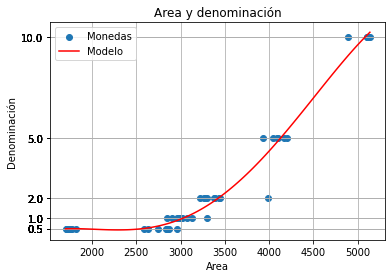

In [41]:
#areas = [41, 37, 33, 31, 29, 24]
#areas = [5137.5, 4200.0, 3262.5, 3021.0, 2631.5, 1713.5]
#coins = [10, 5, 2, 1, .5, .5]
plt.scatter(areas, coins)
#plt.plot(areas, coins)
#plt.plot(listOfAreas, coins1)

mymodel = np.poly1d(np.polyfit(areas, coins, 4))
myline = np.linspace(np.min(areas), np.max(areas), 100)

# set y ticks to be the same as the coins
plt.yticks(coins)
plt.plot(myline, mymodel(myline), 'r-')
plt.grid(True)
# add labels
plt.xlabel('Area')
plt.ylabel('Denominación')
plt.title('Area y denominación')
# add legend
plt.legend(['Monedas', 'Modelo'])
plt.show()

#mymodel(6904.5)

In [42]:

listOfAreas = []
listofPredictions = []
for imagenMonedas in monedas:
    I = cv.imread("monedas/" + imagenMonedas)
    # resize the image to 50% of its original size
    resizeFactor = 0.2
    I = cv.resize(I, (0, 0), fx=resizeFactor, fy=resizeFactor)
    original = I.copy()

    # apply median blur to remove noise
    I = cv.medianBlur(I, 7)

    #apply blur to remove noise
    I = cv.GaussianBlur(I, (3, 3), 0)

    # convert image to hsv
    hsv = cv.cvtColor(I, cv.COLOR_BGR2HSV)

    # define range of blue color in HSV
    greenLowHsv = np.array([0,110,0])
    greenHighHsv = np.array([255,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, greenLowHsv, greenHighHsv)

    # inverse the mask
    mask = cv.bitwise_not(mask)

    # apply the mask to the image
    I = cv.bitwise_and(I, I, mask=mask)

    # convert the image to gray scale
    I = cv.cvtColor(I, cv.COLOR_BGR2GRAY)

    # dilate image
    kernel = np.ones((3, 3), np.uint8)
    I = cv.dilate(I, kernel, iterations=1)

    #cv.imshow("mask", I)

    # find contours
    contours, hierarchy = cv.findContours(I, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # plot only the contours with a large area
    contours = [c for c in contours if cv.contourArea(c) > 500]

    # fit a circle to the contour
    circles = []
    for c in contours:
        (x, y), radius = cv.minEnclosingCircle(c)
        center = (int(x), int(y))
        radius = int(radius)
        circles.append([center, radius])

    # plot the circles
    for c in circles:
        center, radius = c
        cv.circle(original, center, radius, (0, 255, 0), 3)

    # plot the contours
    #cv.drawContours(original, contours, -1, (0, 0, 255), 1)

    # create a label with the number of coins
    numMonedasLabel = str(len(circles)) + " mondedas detectadas"

    # show monedas label on the top left corner
    cv.putText(original, numMonedasLabel, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # get areas of the circles
    areas = [cv.contourArea(c) for c in contours]
    #areas = [c[1]**2 * np.pi for c in circles]
    #areas = [c[1] for c in circles]

    # sort aread from large to small
    areas.sort(reverse=True)

    # get average rgb values per area of the circles using original image
    averageRGB = []
    for c in circles:
        center, radius = c
        x, y = center
        x = int(x)
        y = int(y)
        averageRGB.append(original[y, x, ::-1])

    # make a figure 10x 1
    #plt.figure(figsize=(3, 1))
    #plot average rgb values as grid using matplotlib
    #plt.imshow(np.asanyarray(averageRGB).reshape(1, len(circles), 3))
    #plt.axis('off')
    #plt.show()

    # iterate over areas
    preds = []
    for area in areas:
        val = mymodel(area)
        if val < .5: 
            val = .5
        else:
            val = round_to_nearest(val)
        preds.append(val)

    listofPredictions.append(preds)
    listOfAreas.append(areas)

    # print the areas
    print(preds)
    print(sum(preds))

    # show preds on the top left corner of the image
    cv.putText(original, str(preds), (10, 65), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # display sum
    cv.putText(original, "tienes " + str(sum(preds)) + " pesos", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv.imshow("Img", original)
    cv.waitKey(0)

# close all the windows
cv.destroyAllWindows()

[10, 2, 1, 1, 1, 0.5]
15.5
[10, 2, 1, 1, 1, 0.5]
15.5
[2, 1, 1, 0.5]
4.5
[1, 1, 1, 1, 0.5]
4.5
[10, 5, 2, 2, 1, 1, 1, 1, 0.5]
23.5
[5, 2, 2, 1, 1, 1, 1, 0.5]
13.5
[10, 5, 1, 1, 1, 0.5]
18.5
